In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [3]:
data_folder_path = r'C:\Users\Daniel\PycharmProjects\Daniel_Thesis\Data\Test_21 Mar 2022 18_37_47'

# Load

In [5]:
load_path = data_folder_path+r'\21 Mar 2022 18_37_47_load_cell.csv'
df = pd.read_csv(load_path)

,time,load_lb
0,1.647902e+09,-58.465323
1,1.647902e+09,-60.202255
2,1.647902e+09,-58.153987
3,1.647902e+09,-61.463989
4,1.647902e+09,-58.465323
...,...,...
4535,1.647902e+09,320.824891
4536,1.647902e+09,318.399740
4537,1.647902e+09,320.153059
4538,1.647902e+09,315.892660


In [7]:
df['t'] = df.time-df.time[0]

In [11]:
ini_load = np.mean(df[df.t<20].load_lb)

In [12]:
ini_load

-59.41760562958905

In [13]:
df['corrected_load_lb'] = df.load_lb-ini_load

<AxesSubplot:xlabel='t'>

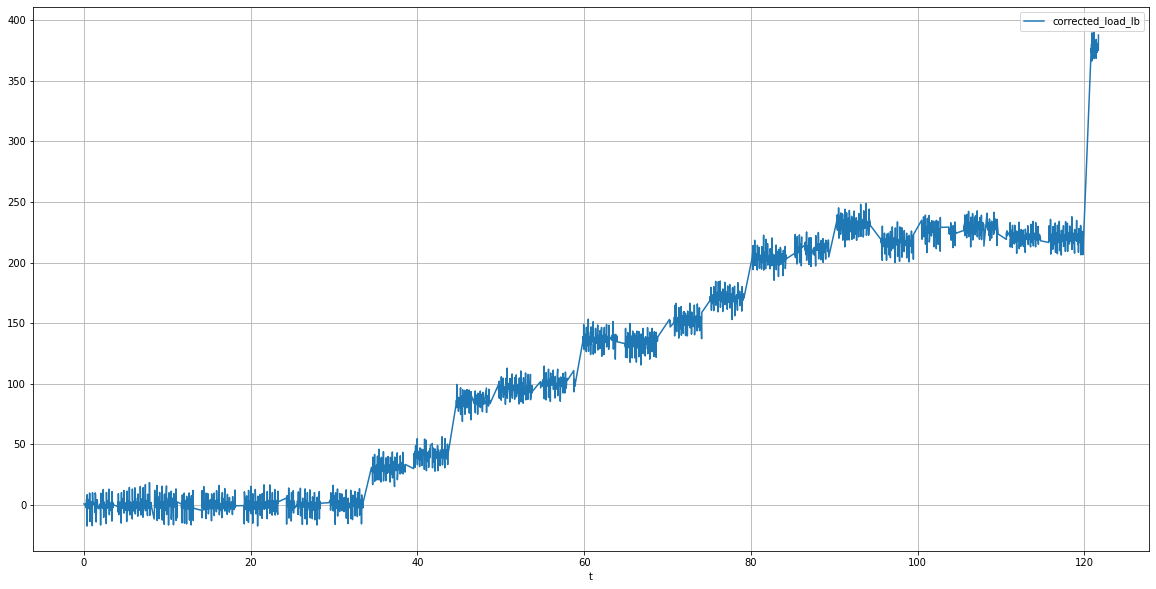

In [16]:
df.plot('t','corrected_load_lb',figsize=(20,10),grid=True)

# Phyphox

In [17]:
phyphox_folder = data_folder_path+r'\phyphox_bottom'
phyphox_data_paths = glob.glob(os.path.join(phyphox_folder,'*.csv'))
phyphox_data_paths

['C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\Flat.csv',
 'C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\Plane.csv',
 'C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\Side.csv',
 'C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\Upright.csv']

<AxesSubplot:xlabel='t (s)'>

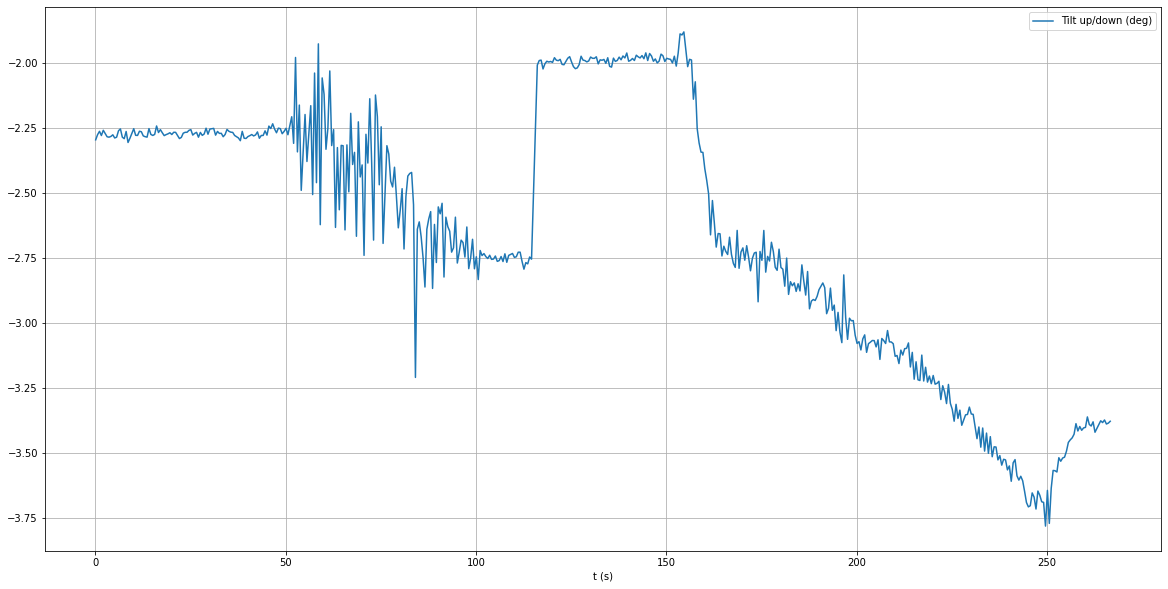

In [21]:
df_phy = pd.read_csv(phyphox_data_paths[0])
df_phy.plot('t (s)', 'Tilt up/down (deg)',figsize=(20,10),grid=True)

<AxesSubplot:xlabel='t (s)'>

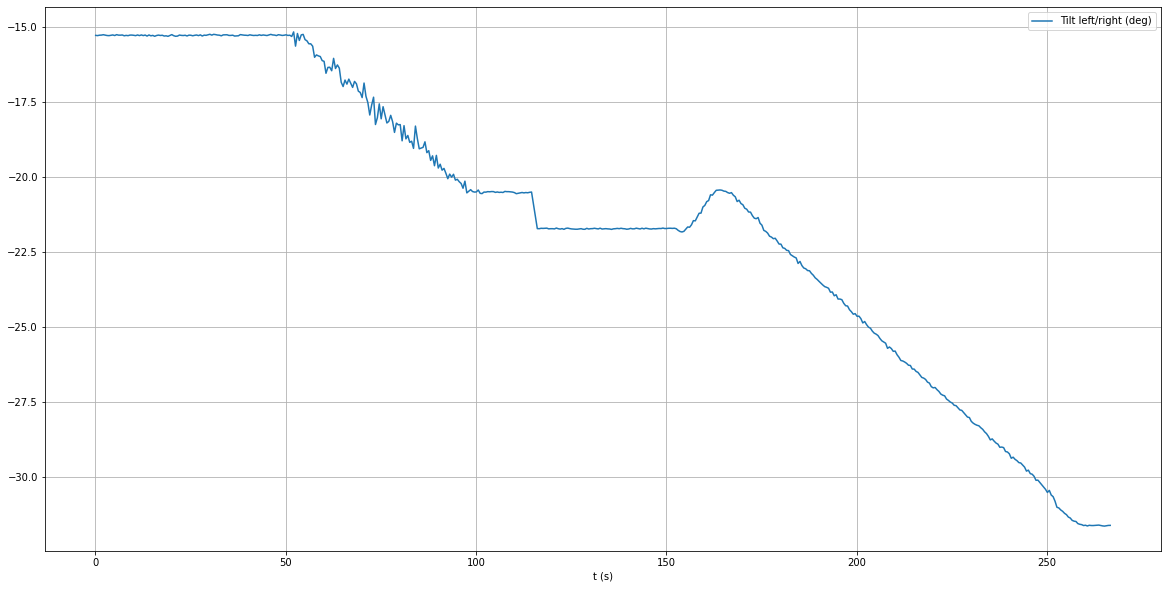

In [22]:
df_phy.plot('t (s)', 'Tilt left/right (deg)',figsize=(20,10),grid=True)

In [23]:
df_phy = pd.read_csv(phyphox_data_paths[1])
df_phy.columns

Index(['t (s)', 'Inclination (deg)', 'Rotation (deg)'], dtype='object')

<AxesSubplot:xlabel='t (s)'>

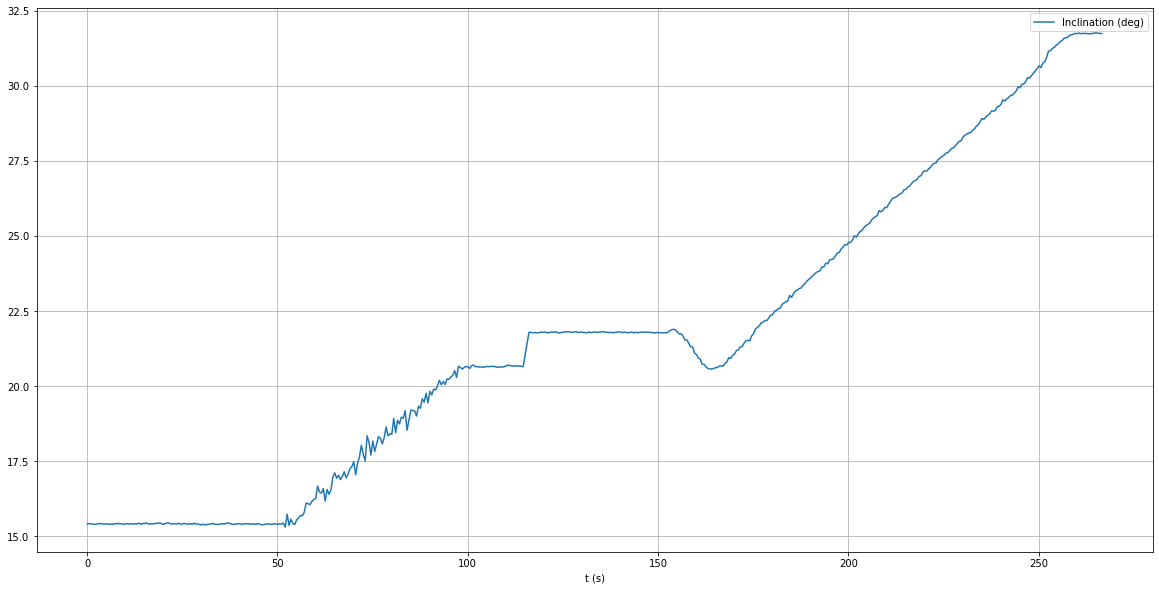

In [24]:
df_phy.plot('t (s)', 'Inclination (deg)',figsize=(20,10),grid=True)

<AxesSubplot:xlabel='t (s)'>

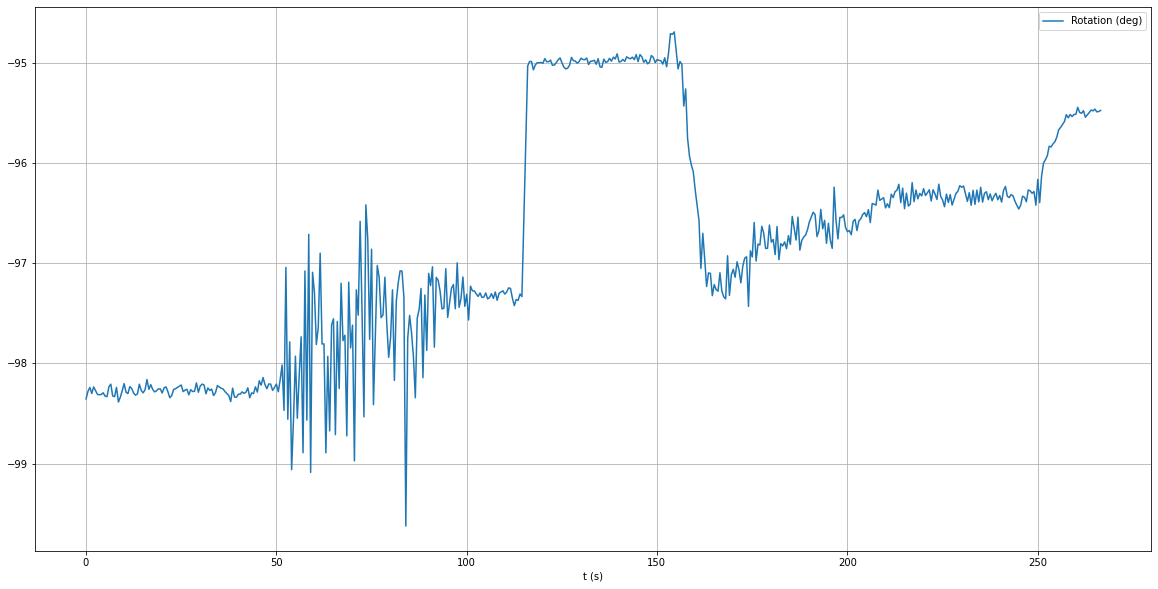

In [25]:
df_phy.plot('t (s)', 'Rotation (deg)',figsize=(20,10),grid=True)

## Experiments

In [26]:
path_folder_exp = r'C:\Users\Daniel\PycharmProjects\Daniel_Thesis\Processing\phyphox'
exp_folders = glob.glob(os.path.join(path_folder_exp,'*'))

In [143]:
def file_paths(folder):
  file_list = []
  for root, _, filenames in os.walk(folder):
    for filename in filenames:
        file_list.append(os.path.join(root, filename))
  return file_list
def read_lines(path):
    f = open(path, 'r')
    lines = f.readlines()
    for line in lines:
        print(line)
def merge_phyphox_data(data_file_paths):
    DF, dnames = [], ['Flat','Plane','Side','Upright']
    for file_path in data_file_paths[0:4]:
        bname = os.path.basename(file_path).split('.')[0]
        if bname in dnames:
            df = pd.read_csv(file_path)
            df.columns = [col if col == 't (s)' else bname+' '+col for col in df.columns]
            DF.append(df)
    if len(DF)>0:
        df = pd.concat(DF,axis=1)
        df = df.T.drop_duplicates().T
    else:
        print('no dataframes')
    try:
        df_t = pd.read_csv(data_file_paths[-1])
        t_ini = df_t[df_t['event']== 'START']['system time'].tolist()[0] - 20*60*60
        df['time'] = df['t (s)'] + t_ini
        return df
    except:
        print(t_ini)
        return df
def plot_phyphox_data(exp_folders_path):
    df = merge_phyphox_data(file_paths(exp_folders_path))
    ax = df.plot('t (s)',['Flat Tilt up/down (deg)', 'Flat Tilt left/right (deg)',
       'Plane Inclination (deg)', 'Plane Rotation (deg)',
       'Side Tilt up/down (deg)', 'Side Tilt left/right (deg)',
       'Upright Tilt up/down (deg)'],figsize=(20,10),grid=True)
    plt.title(exp_folders_path.split('\\')[-1])
def interpolate(t,val1,val2):
    return val1[0]+(val2[1]-val1[1])/(val2[0]-val1[0])*(t-val1[0])

In [75]:
df = merge_phyphox_data(file_paths(exp_folders[0]))

In [ ]:
df

,t (s),Flat Tilt up/down (deg),Flat Tilt left/right (deg),Plane Inclination (deg),Plane Rotation (deg),Side Tilt up/down (deg),Side Tilt left/right (deg),Upright Tilt up/down (deg),time
0,1.03823,0.059177,0.097207,0.113803,58.668093,31.331907,89.902793,89.940823,1.647902e+09
1,1.53823,0.214639,0.144605,0.258805,33.968589,56.031411,89.855395,89.785361,1.647902e+09
2,2.03823,0.199037,0.662366,0.691620,73.275429,16.724571,89.337634,89.800963,1.647902e+09
3,2.53823,0.856796,2.465232,2.609532,70.844650,19.155350,87.534768,89.143204,1.647902e+09
4,3.03823,1.761279,5.149340,5.439168,71.159035,18.840965,84.850660,88.238721,1.647902e+09
5,3.53823,3.443211,8.393071,9.053409,67.814519,22.185481,81.606929,86.556789,1.647902e+09
6,4.03823,5.226913,16.623203,17.341236,72.964264,17.035736,73.376797,84.773087,1.647902e+09
7,4.53823,6.854368,22.857671,23.670230,74.084327,15.915673,67.142329,83.145632,1.647902e+09
8,5.03823,9.630038,30.799777,31.790316,74.111646,15.888354,59.200223,80.369962,1.647902e+09
9,5.53823,10.842489,38.363586,39.159303,76.397857,13.602143,51.636414,79.157511,1.647902e+09


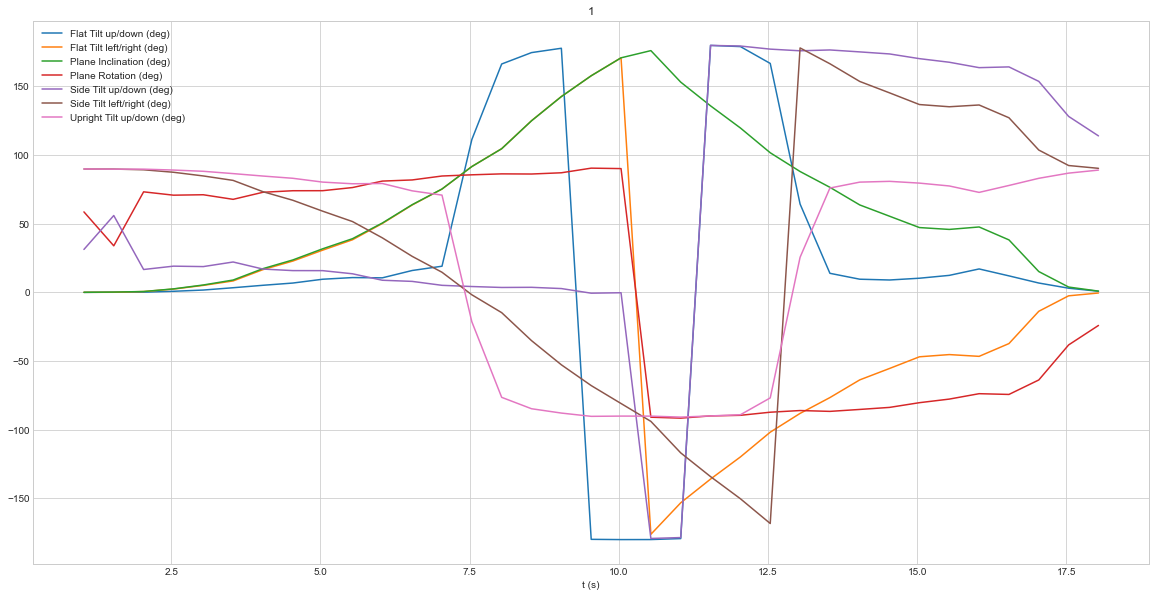

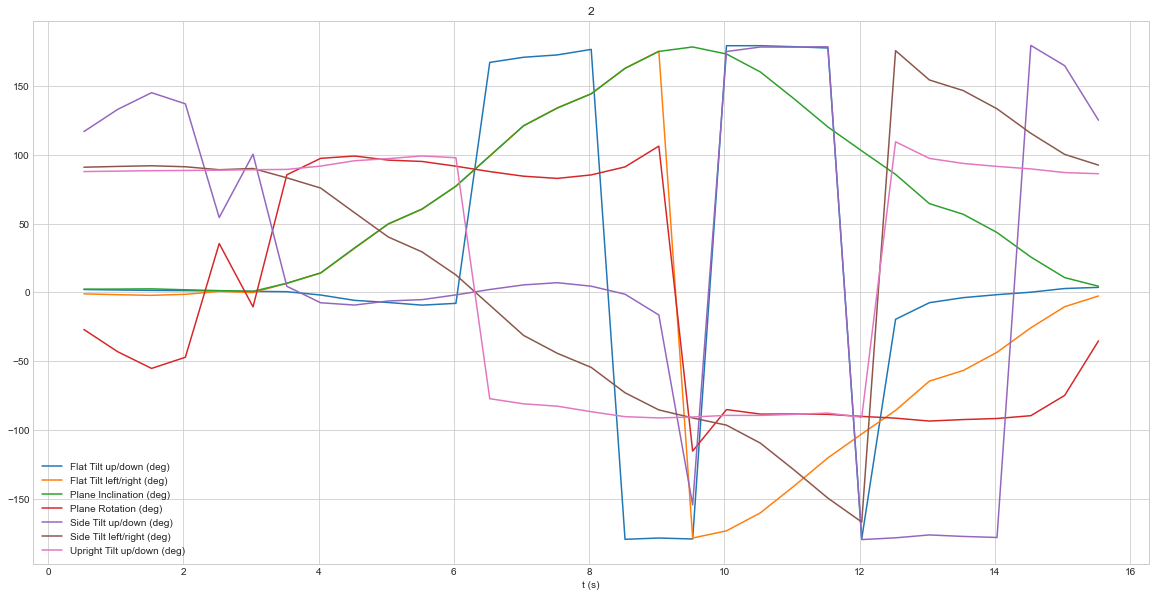

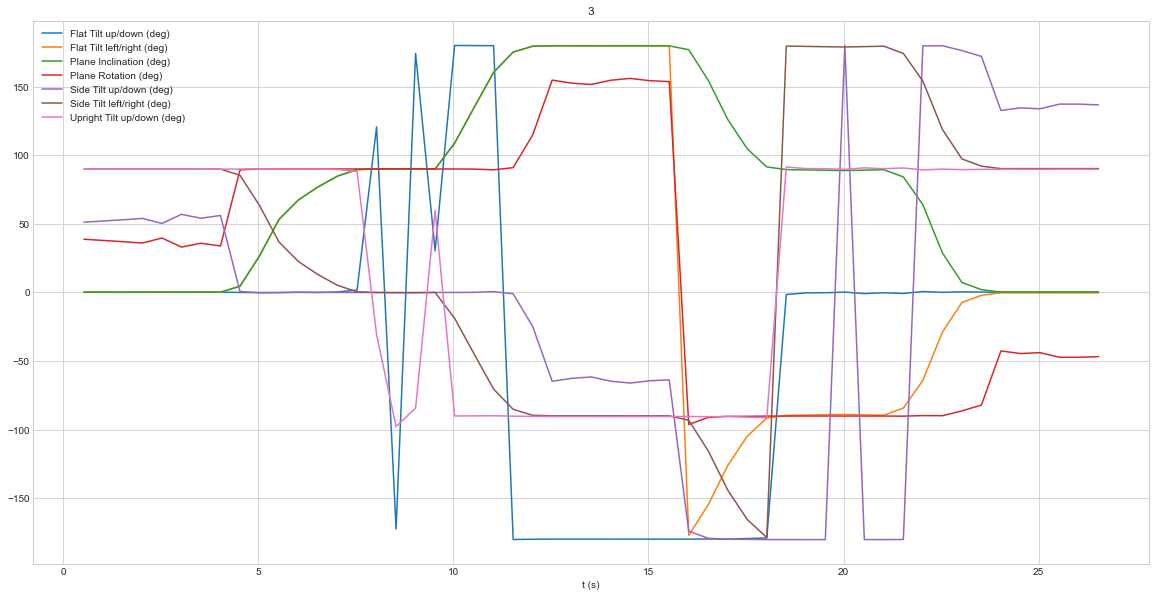

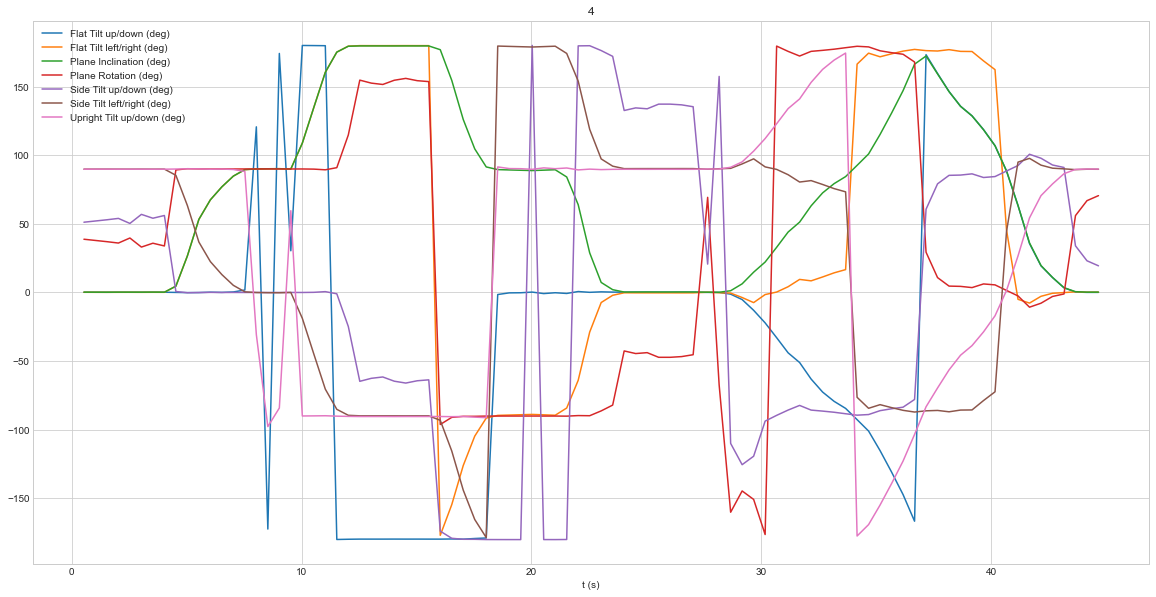

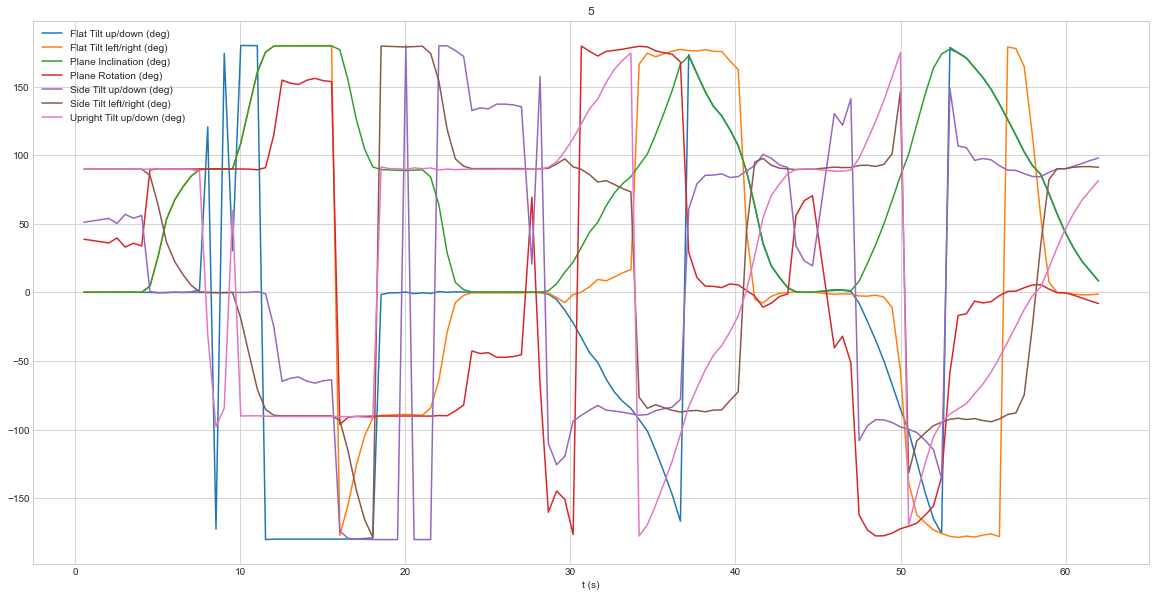

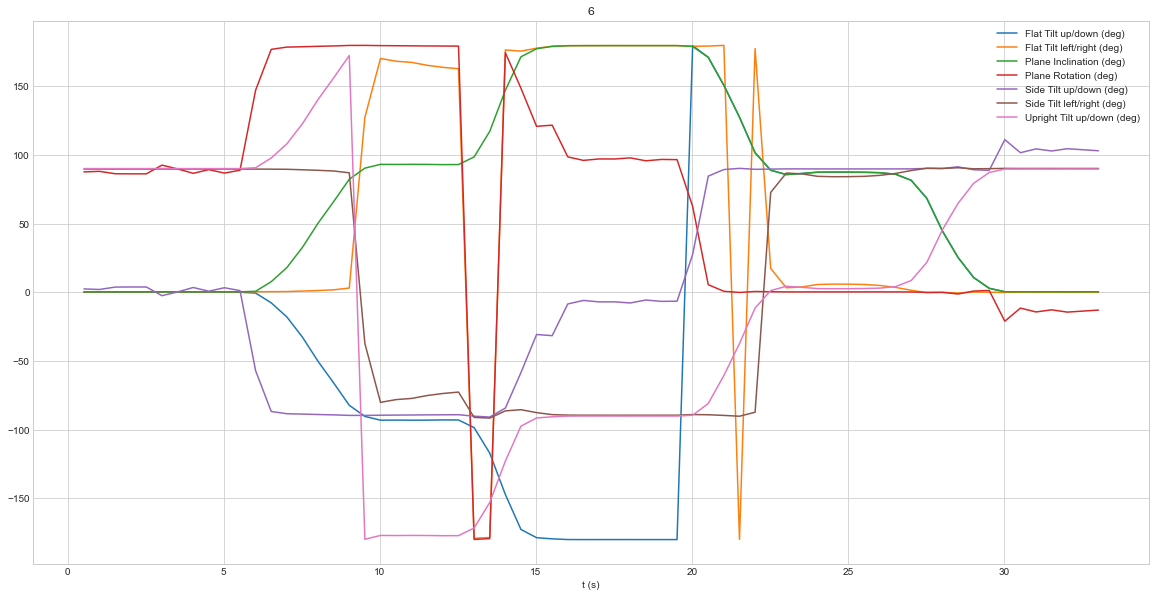

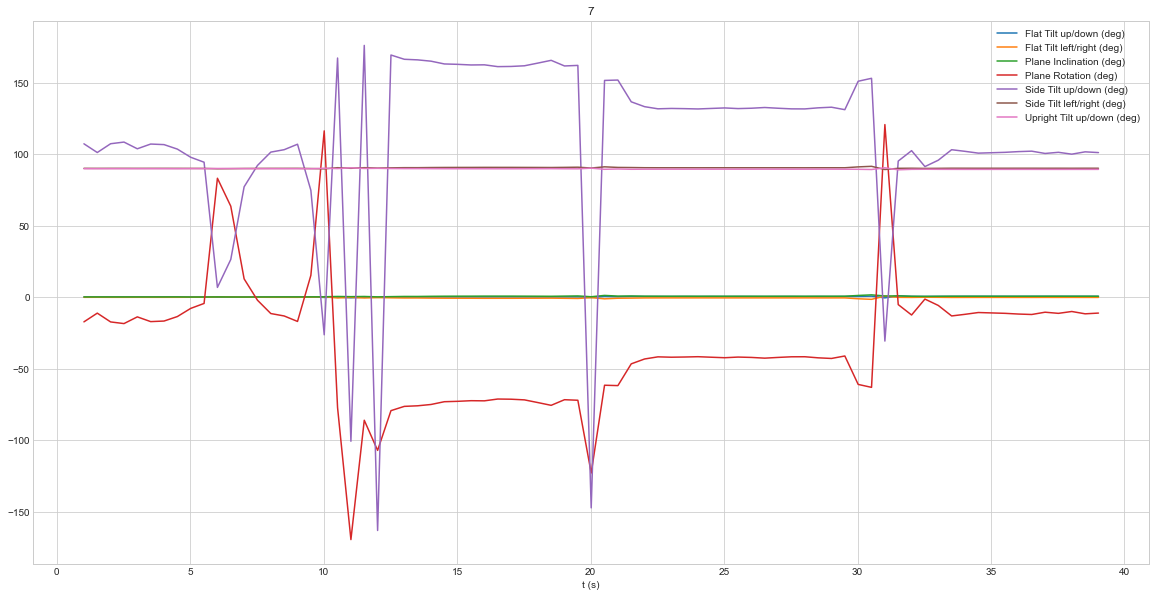

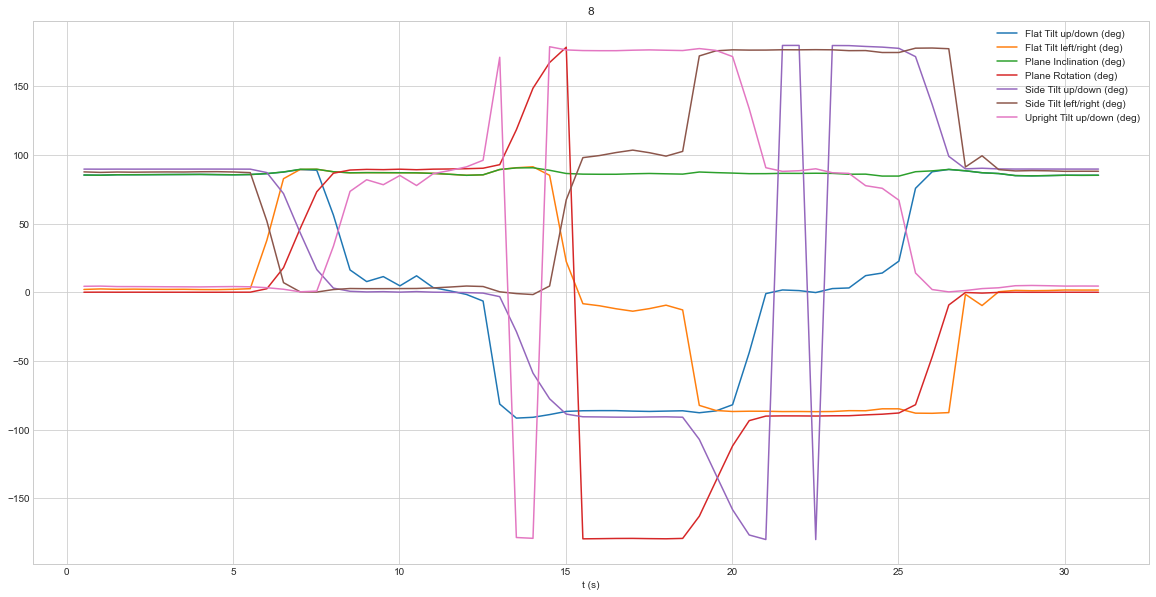

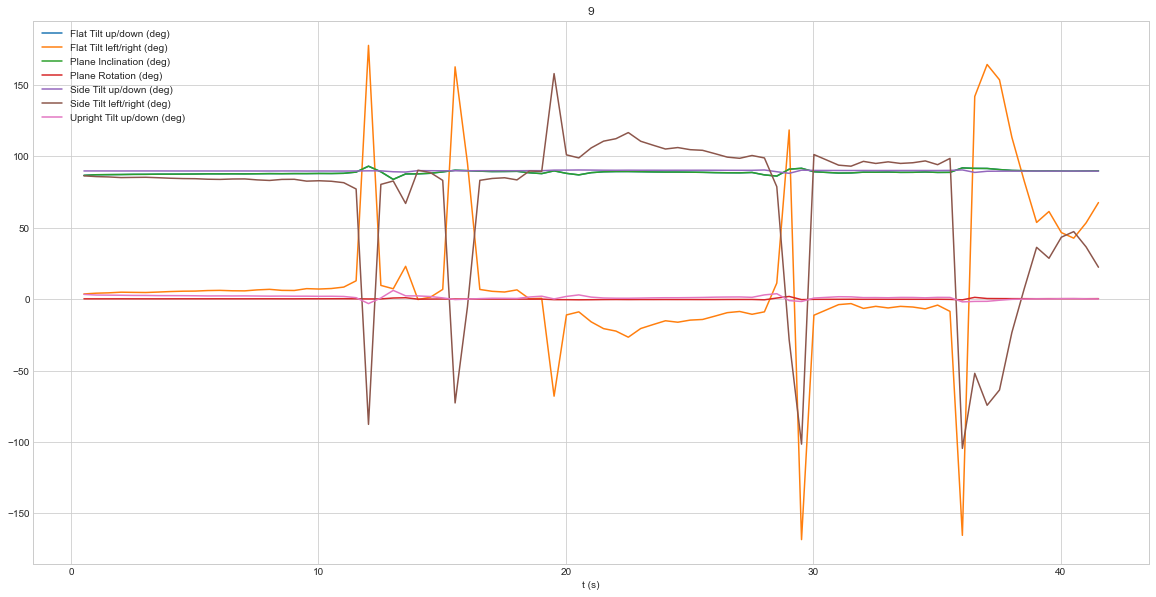

In [102]:
for exp_folder in exp_folders:
    plot_phyphox_data(exp_folder)

## Test 21 Mar 2022

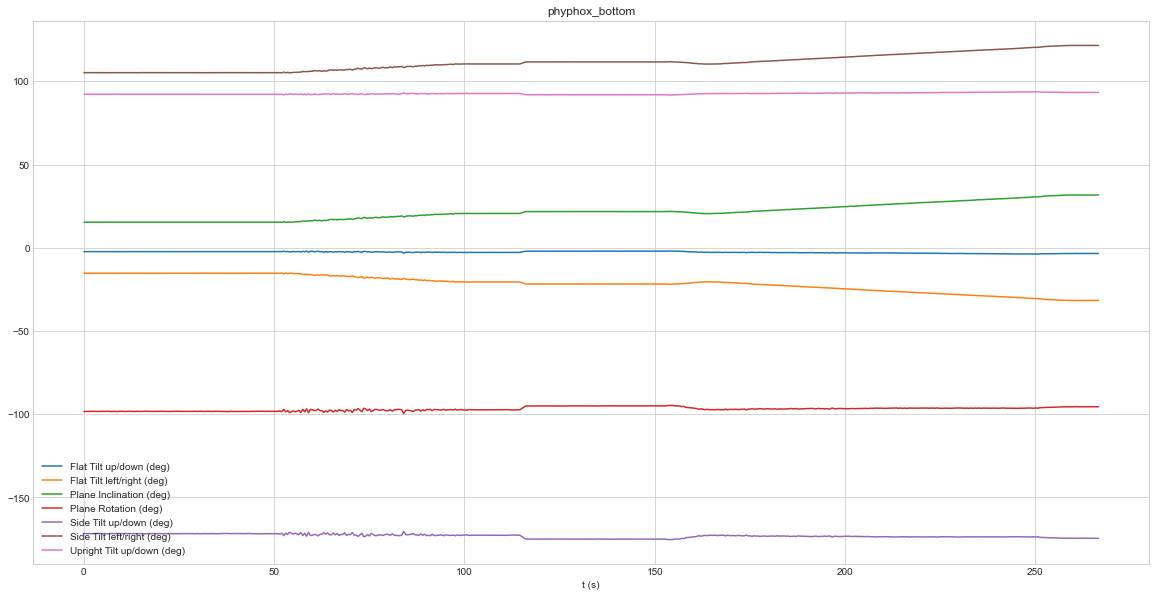

In [103]:
plot_phyphox_data(data_folder_path+r'\phyphox_bottom')

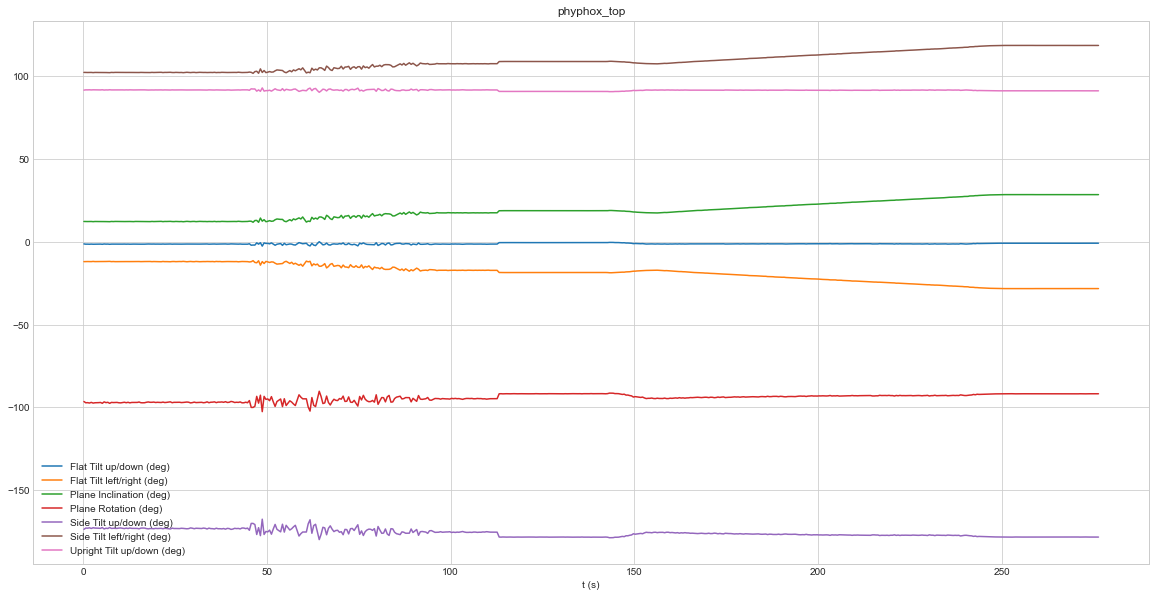

In [104]:
plot_phyphox_data(data_folder_path+r'\phyphox_top')

In [106]:
lista_bottom = file_paths(data_folder_path+r'\phyphox_bottom')
lista_top = file_paths(data_folder_path+r'\phyphox_top')

In [107]:
lista_bottom

['C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\Flat.csv',
 'C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\Plane.csv',
 'C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\Side.csv',
 'C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\Upright.csv',
 'C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\meta\\device.csv',
 'C:\\Users\\Daniel\\PycharmProjects\\Daniel_Thesis\\Data\\Test_21 Mar 2022 18_37_47\\phyphox_bottom\\meta\\time.csv']

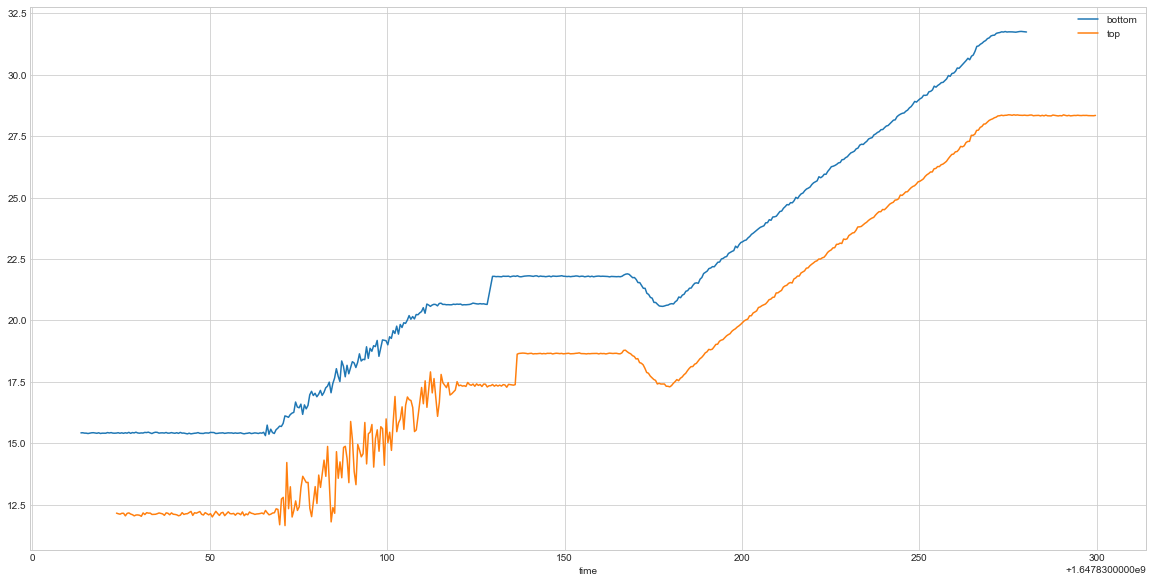

In [122]:
df_bottom = merge_phyphox_data(lista_bottom)
df_top = merge_phyphox_data(lista_top)
fig,ax = plt.subplots()
df_bottom.plot('time', 'Plane Inclination (deg)', ax=ax, figsize=(20,10),grid=True)
df_top.plot('time', 'Plane Inclination (deg)', ax=ax, figsize=(20,10),grid=True)
ax.legend(['bottom','top'])
plt.show()

In [113]:
df_bottom.columns

Index(['t (s)', 'Flat Tilt up/down (deg)', 'Flat Tilt left/right (deg)',
       'Plane Inclination (deg)', 'Plane Rotation (deg)',
       'Side Tilt up/down (deg)', 'Side Tilt left/right (deg)',
       'Upright Tilt up/down (deg)', 'time'],
      dtype='object')

In [123]:
df_bottom['Bottom Plane Inclination (deg)'] = df_bottom['Plane Inclination (deg)']
df_top['Top Plane Inclination (deg)'] = df_top['Plane Inclination (deg)']

In [124]:
df_phy = pd.concat([df_bottom[['time','Bottom Plane Inclination (deg)']],df_top[['time','Top Plane Inclination (deg)']]])

In [126]:
df_phy = df_phy.sort_values(by='time')
df_phy

,time,Bottom Plane Inclination (deg),Top Plane Inclination (deg)
0,1.647830e+09,15.419915,NaN
1,1.647830e+09,15.424643,NaN
2,1.647830e+09,15.409610,NaN
3,1.647830e+09,15.408657,NaN
4,1.647830e+09,15.393405,NaN
...,...,...,...
541,1.647830e+09,NaN,28.334803
542,1.647830e+09,NaN,28.333250
543,1.647830e+09,NaN,28.333458
544,1.647830e+09,NaN,28.330701


In [149]:
df_phy['Bottom Plane Inclination (deg)'] = df_phy['Bottom Plane Inclination (deg)'].interpolate()
df_phy['Top Plane Inclination (deg)'] = df_phy['Top Plane Inclination (deg)'].interpolate()

In [153]:
df_phy = df_phy.drop_duplicates()

In [156]:
df_phy = df_phy.reset_index()

<AxesSubplot:xlabel='time'>

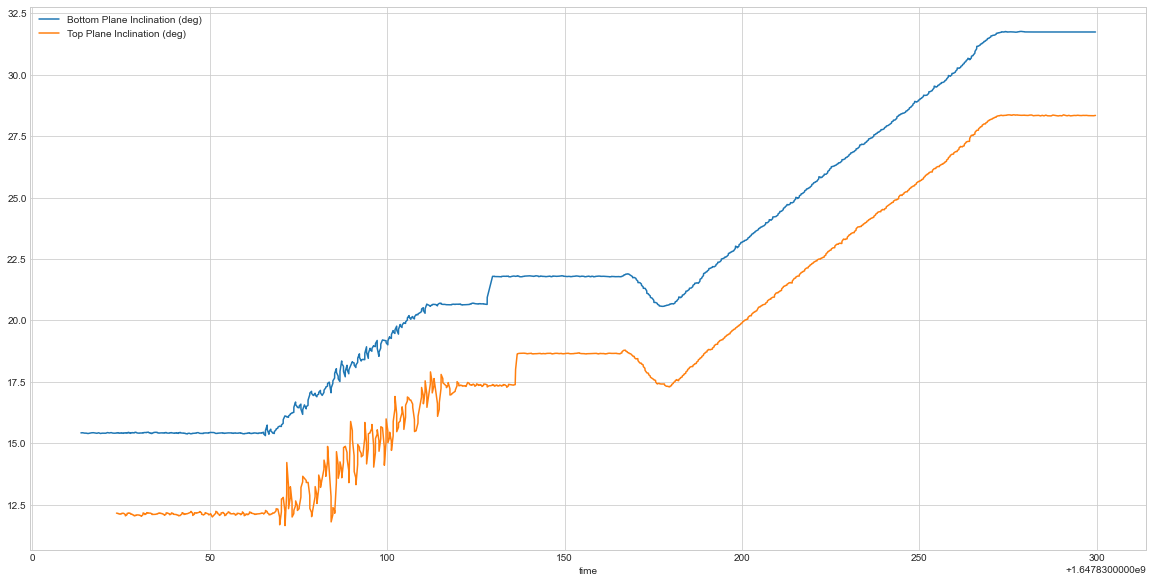

In [150]:
df_phy.plot('time',['Bottom Plane Inclination (deg)','Top Plane Inclination (deg)'],figsize=(20,10),grid=True)

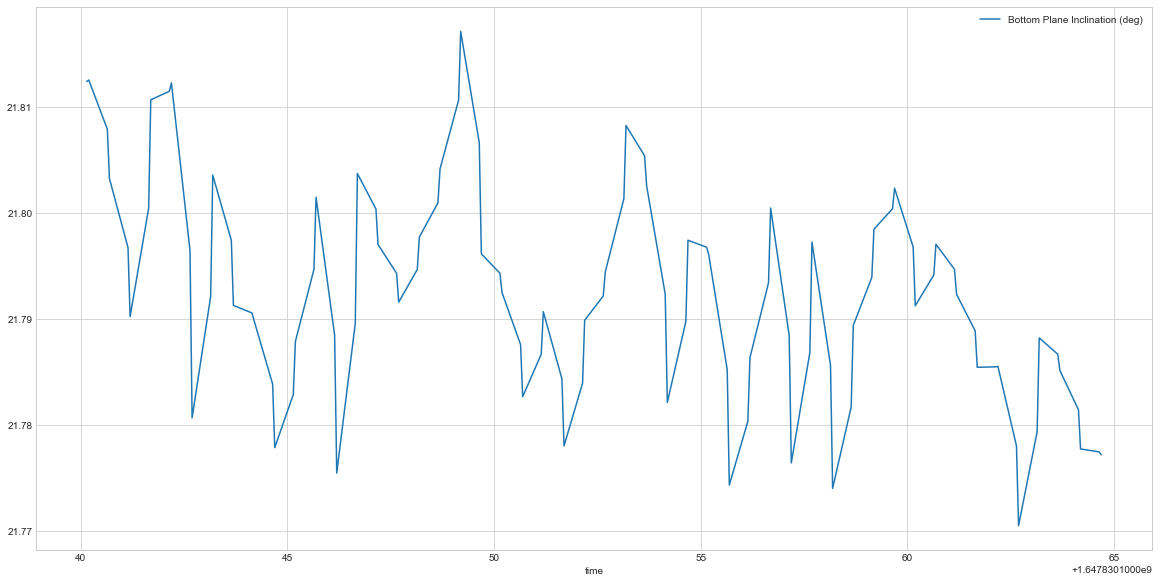

In [170]:
ax = df_phy[(df_phy.time>=140+1647830000)&(df_phy.time<=165+1647830000)].plot('time','Bottom Plane Inclination (deg)',figsize=(20,10),grid=True)

In [172]:
ini_bott = df_phy[(df_phy.time>=140+1647830000)&(df_phy.time<=165+1647830000)]['Bottom Plane Inclination (deg)'].mean()

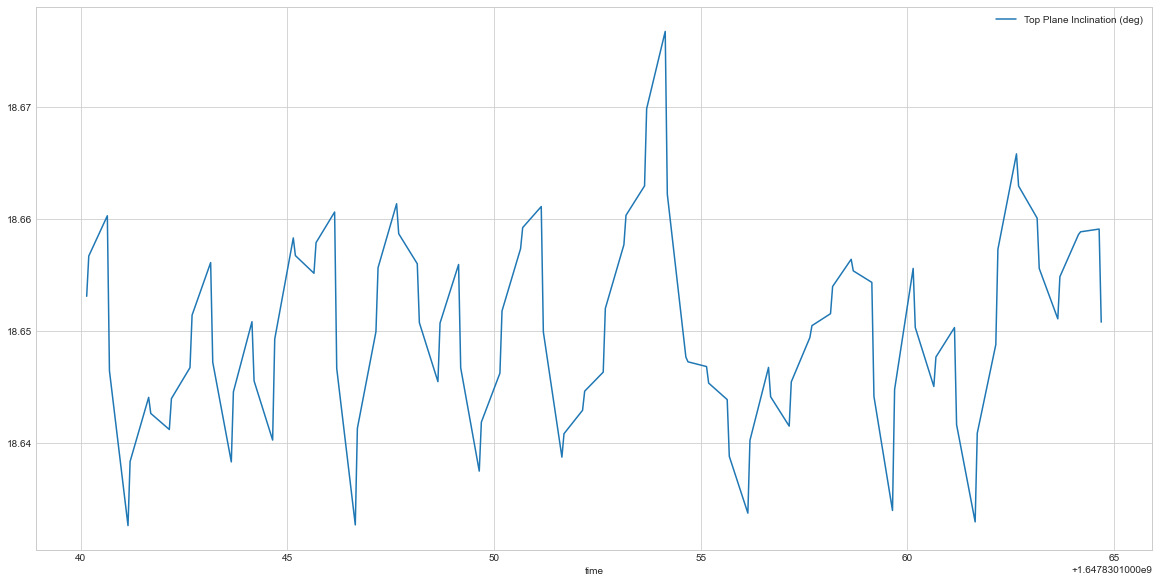

In [173]:
ax = df_phy[(df_phy.time>=140+1647830000)&(df_phy.time<=165+1647830000)].plot('time','Top Plane Inclination (deg)',figsize=(20,10),grid=True)

In [174]:
ini_top = df_phy[(df_phy.time>=140+1647830000)&(df_phy.time<=165+1647830000)]['Top Plane Inclination (deg)'].mean()

In [175]:
df_phy['Bottom Fixed Plane Inclination (deg)'] = df_phy['Bottom Plane Inclination (deg)'] - (ini_bott-ini_top)

In [176]:
df_phy['difference'] = df_phy['Bottom Fixed Plane Inclination (deg)'] - df_phy['Top Plane Inclination (deg)']

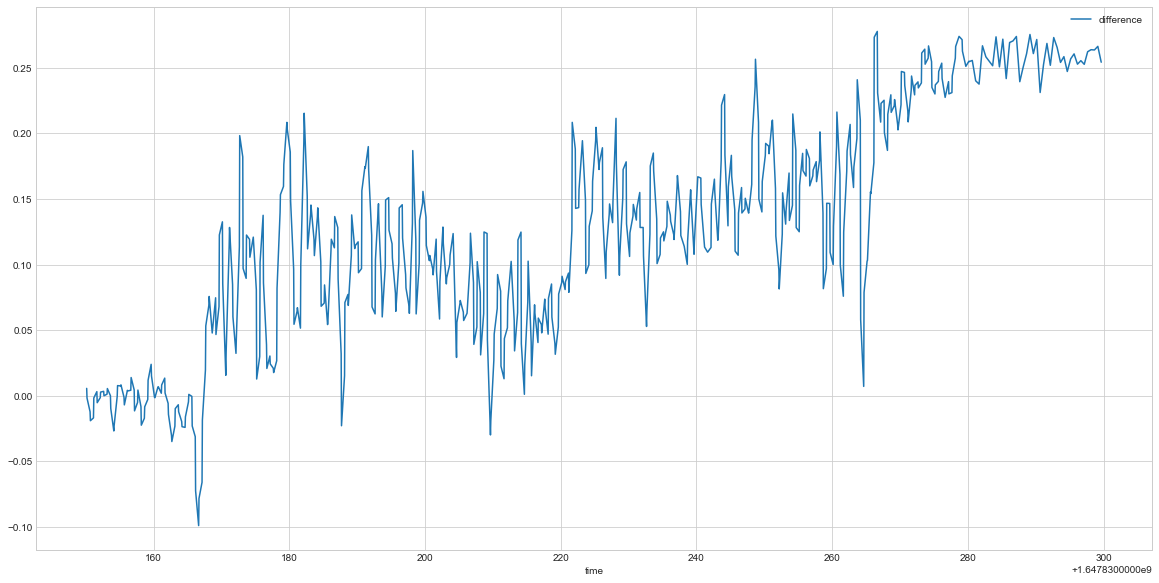

In [177]:
ax = df_phy[df_phy.time>=150+1647830000].plot('time','difference',figsize=(20,10),grid=True)

<AxesSubplot:xlabel='time'>

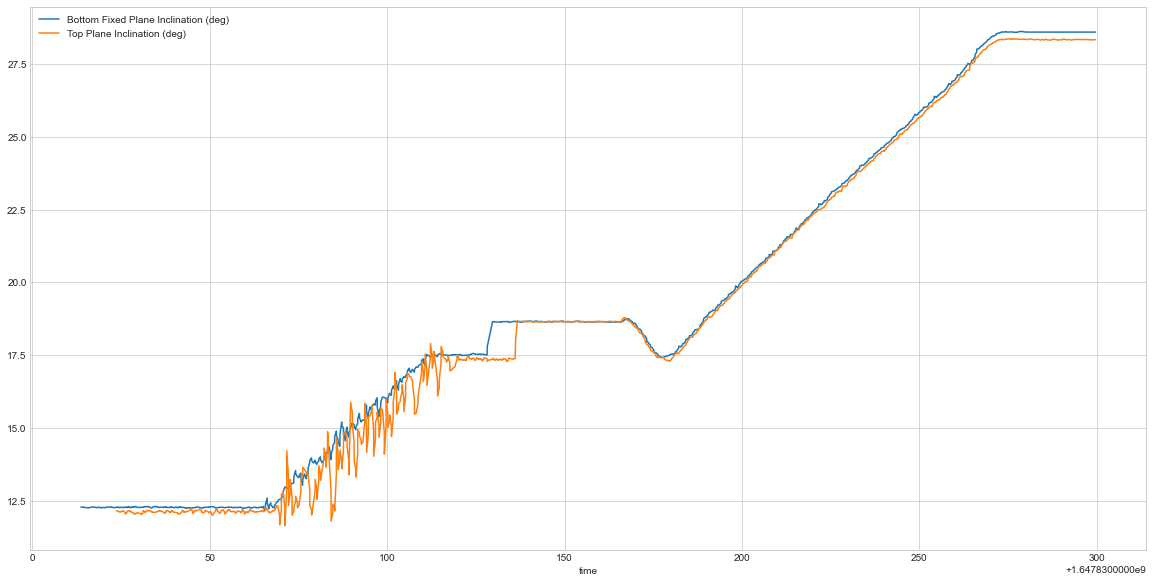

In [181]:
df_phy.plot('time',['Bottom Fixed Plane Inclination (deg)','Top Plane Inclination (deg)'],figsize=(20,10),grid=True)